In [ ]:
# Phase 1: Data Collection and Preparation — Estonia Passenger Dataset

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import joblib


# -----------------------------
# Task 1.1: Load the dataset
# -----------------------------
df = pd.read_csv("C:\\Users\\USER\\Desktop\\Testing\\ML_work\\Estonia\\estonia-passenger-list.csv")  # Replace with actual path if needed
print("✅ Dataset loaded successfully")


✅ Dataset loaded successfully


In [4]:

# -----------------------------
# Task 1.2: Inspect the data
# -----------------------------
print("\n📊 Dataset Overview:")
print(f"Shape: {df.shape}")
print(df.info())
print(df.describe(include='all'))
print(df.head())



📊 Dataset Overview:
Shape: (989, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB
None
        PassengerId Country Firstname   Lastname  Sex         Age Category  \
count    989.000000     989       989        989  989  989.000000      989   
unique          NaN      16       849        774    2         NaN        2   
top             NaN  Sweden     RAIVO  ANDERSSON    M         NaN        P   
freq            NaN     550         8         15  503         NaN      796   
mea

In [5]:
# -----------------------------
# Task 1.3: Handle missing values
# -----------------------------
missing = df.isnull().sum()
print("\n🔍 Missing Values:\n", missing)


🔍 Missing Values:
 PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64


In [6]:
# Fill missing values (basic strategy)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Sex"].fillna("Unknown", inplace=True)
df["Survived"].fillna(0, inplace=True)
df.fillna("Unknown", inplace=True)
print("✅ Missing values handled")

✅ Missing values handled


C:\Users\USER\AppData\Local\Temp\ipykernel_6908\878319973.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_6908\878319973.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [7]:

# -----------------------------
# Task 1.4: Remove duplicates
# -----------------------------
duplicates = df.duplicated().sum()
print(f"\n🧹 Duplicate rows found: {duplicates}")
df.drop_duplicates(inplace=True)
print("✅ Duplicates removed")



🧹 Duplicate rows found: 0
✅ Duplicates removed


In [8]:
# -----------------------------
# Task 1.5: Validate and clean data types
# -----------------------------
# Convert Age and Survived to numeric
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Survived"] = pd.to_numeric(df["Survived"], errors="coerce")

# Standardize categorical values
df["Sex"] = df["Sex"].str.strip().str.capitalize()
df["Category"] = df["Category"].str.upper().map({"C": "Crew", "P": "Passenger"})
print("✅ Data types and categories cleaned")

# -----------------------------
# Task 1.6: Save cleaned dataset
# -----------------------------
df.to_csv("estonia_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'estonia_cleaned.csv'")


✅ Data types and categories cleaned
✅ Cleaned dataset saved as 'estonia_cleaned.csv'


In [10]:
# Phase 2: Exploratory Data Analysis — Estonia Passenger Dataset
# Load cleaned dataset
df = pd.read_csv("estonia_cleaned.csv")
print("✅ Cleaned dataset loaded")

✅ Cleaned dataset loaded



📊 Age Distribution:
count    989.000000
mean      44.575329
std       17.235146
min        0.000000
25%       30.000000
50%       44.000000
75%       59.000000
max       87.000000
Name: Age, dtype: float64


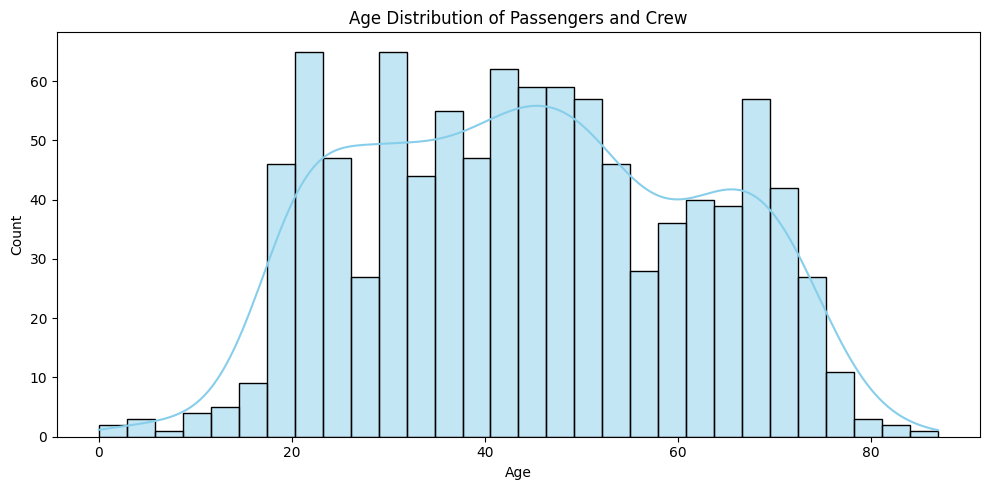

In [11]:
# -----------------------------
# Task 2.1: Understand feature distributions
# -----------------------------
print("\n📊 Age Distribution:")
print(df["Age"].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Passengers and Crew")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



🛟 Overall Survival Rate:
Survived
0    86.147624
1    13.852376
Name: proportion, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_6908\491995317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


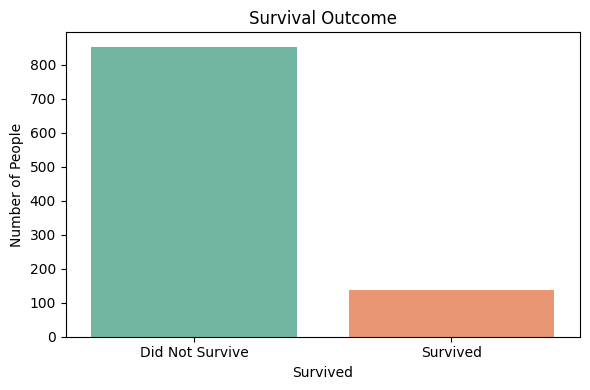

In [12]:
# -----------------------------
# Task 2.2: Survival rate analysis
# -----------------------------
survival_rate = df["Survived"].value_counts(normalize=True) * 100
print("\n🛟 Overall Survival Rate:")
print(survival_rate)

plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Outcome")
plt.xticks([0, 1], ["Did Not Survive", "Survived"])
plt.ylabel("Number of People")
plt.tight_layout()
plt.show()


🧍 Survival Rate by Gender:
Sex
F     5.555556
M    21.868787
Name: Survived, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_6908\1179179385.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_survival.index, y=gender_survival.values, palette="coolwarm")


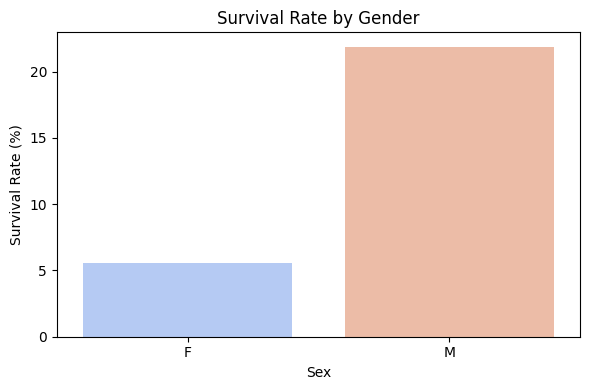

In [13]:
# -----------------------------
# Task 2.3: Survival by gender
# -----------------------------
gender_survival = df.groupby("Sex")["Survived"].mean() * 100
print("\n🧍 Survival Rate by Gender:")
print(gender_survival)

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_survival.index, y=gender_survival.values, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate (%)")
plt.tight_layout()
plt.show()



🧑‍✈️ Survival Rate by Category:
Category
Crew         20.207254
Passenger    12.311558
Name: Survived, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_6908\4229788013.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_survival.index, y=category_survival.values, palette="viridis")


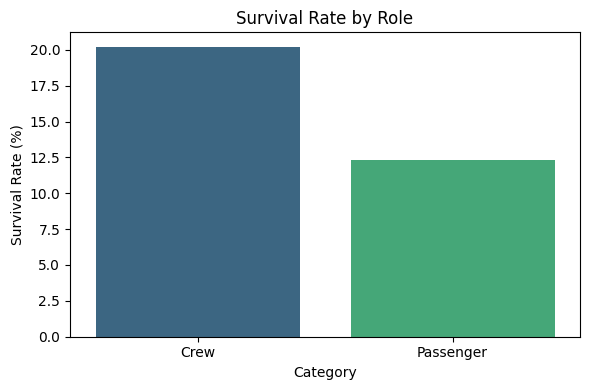

In [14]:

# -----------------------------
# Task 2.4: Survival by category (Passenger vs Crew)
# -----------------------------
category_survival = df.groupby("Category")["Survived"].mean() * 100
print("\n🧑‍✈️ Survival Rate by Category:")
print(category_survival)

plt.figure(figsize=(6, 4))
sns.barplot(x=category_survival.index, y=category_survival.values, palette="viridis")
plt.title("Survival Rate by Role")
plt.ylabel("Survival Rate (%)")
plt.tight_layout()
plt.show()

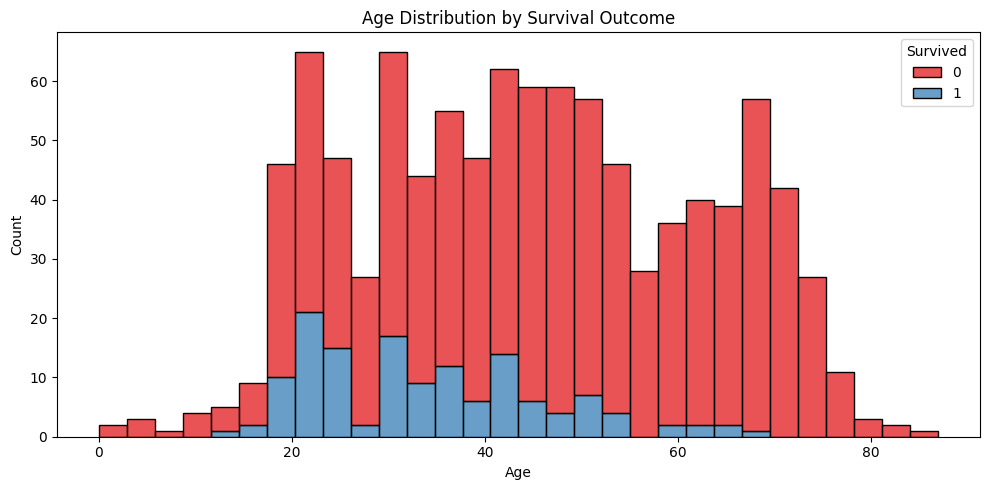

In [15]:
# -----------------------------
# Task 2.5: Age vs Survival
# -----------------------------
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30, palette="Set1")
plt.title("Age Distribution by Survival Outcome")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [16]:
# Phase 3: Data Preprocessing — Estonia Passenger Dataset
# -----------------------------
# Task 3.1: Load cleaned dataset
# -----------------------------
df = pd.read_csv("estonia_cleaned.csv")
print("✅ Cleaned dataset loaded")



✅ Cleaned dataset loaded


In [19]:
# -----------------------------
# Task 3.2: Encode categorical variables
# -----------------------------
# Encode 'Sex' column
sex_encoder = LabelEncoder()
df["Sex_encoded"] = sex_encoder.fit_transform(df["Sex"])

# Encode 'Category' column (Crew/Passenger)
category_encoder = LabelEncoder()
df["Category_encoded"] = category_encoder.fit_transform(df["Category"])

# Encode 'Country' (optional — high cardinality)
if df["Country"].nunique() < 20:
    country_encoder = LabelEncoder()
    df["Country_encoded"] = country_encoder.fit_transform(df["Country"])
else:
    df["Country_encoded"] = 0  # or drop if too sparse

print("✅ Categorical variables encoded")

✅ Categorical variables encoded


In [20]:
# -----------------------------
# Task 3.3: Select features for modeling
# -----------------------------
features = [
    "Age",
    "Sex_encoded",
    "Category_encoded",
    "Country_encoded"
]

X = df[features]
y = df["Survived"]

print(f"📊 Feature matrix shape: {X.shape}")
print(f"🎯 Target vector shape: {y.shape}")



📊 Feature matrix shape: (989, 4)
🎯 Target vector shape: (989,)


In [21]:
# -----------------------------
# Task 3.4: Handle missing values in features
# -----------------------------
X.fillna(X.median(), inplace=True)
print("✅ Missing values in features handled")

✅ Missing values in features handled


C:\Users\USER\AppData\Local\Temp\ipykernel_6908\1873272605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


In [22]:

# -----------------------------
# Task 3.5: Scale numerical features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("✅ Features scaled")


✅ Features scaled


In [23]:
# -----------------------------
# Task 3.6: Save preprocessed data
# -----------------------------
X_scaled_df["Survived"] = y.values
X_scaled_df.to_csv("estonia_preprocessed.csv", index=False)
print("✅ Preprocessed dataset saved as 'estonia_preprocessed.csv'")


✅ Preprocessed dataset saved as 'estonia_preprocessed.csv'


In [34]:
import joblib
meta = {
    "defaults": {"Age": 41.0, "Sex_encoded": 1, "Category_encoded": 0, "Country_encoded": 0},
    "country_map": {"Sweden": 1, "Estonia": 2, "Unknown": 0}
}
joblib.dump(meta, "preprocess_meta.pkl")


['preprocess_meta.pkl']

In [35]:
# Phase 3: Preprocessing with Rare Country Handling — Estonia Dataset

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# -----------------------------
# Load cleaned dataset
# -----------------------------
df = pd.read_csv("estonia_cleaned.csv")
print("✅ Loaded cleaned dataset")

# -----------------------------
# Group rare countries as 'Other'
# -----------------------------
country_counts = df["Country"].value_counts()
rare_countries = country_counts[country_counts < 5].index
df["Country"] = df["Country"].replace(rare_countries, "Other")

# -----------------------------
# Encode categorical variables
# -----------------------------
df["Sex_encoded"] = df["Sex"].map({"Male": 1, "Female": 0}).fillna(1).astype(int)
df["Category_encoded"] = df["Category"].map({"Passenger": 0, "Crew": 1}).fillna(0).astype(int)

# Label encode Country
country_encoder = LabelEncoder()
df["Country_encoded"] = country_encoder.fit_transform(df["Country"])

# Save country mapping
country_map = dict(zip(country_encoder.classes_, country_encoder.transform(country_encoder.classes_)))

# -----------------------------
# Select features and target
# -----------------------------
features = ["Age", "Sex_encoded", "Category_encoded", "Country_encoded"]
X = df[features]
y = df["Survived"]

# -----------------------------
# Handle missing values
# -----------------------------
X.fillna(X.median(), inplace=True)

# -----------------------------
# Scale numerical features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# -----------------------------
# Save preprocessed data
# -----------------------------
X_scaled_df["Survived"] = y.values
X_scaled_df.to_csv("estonia_preprocessed.csv", index=False)
print("✅ Saved preprocessed dataset")

# -----------------------------
# Save metadata for app
# -----------------------------
meta = {
    "defaults": {
        "Age": float(df["Age"].median()),
        "Sex_encoded": 1,
        "Category_encoded": 0,
        "Country_encoded": int(X["Country_encoded"].mode()[0])
    },
    "country_map": country_map
}

joblib.dump(meta, "preprocess_meta.pkl")
print("✅ Saved preprocess metadata as 'preprocess_meta.pkl'")


✅ Loaded cleaned dataset
✅ Saved preprocessed dataset
✅ Saved preprocess metadata as 'preprocess_meta.pkl'


C:\Users\USER\AppData\Local\Temp\ipykernel_6908\1293082245.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


In [25]:
# Phase 4: Model Training and Evaluation — Estonia Passenger Dataset
# -----------------------------
# Task 4.1: Load preprocessed data
# -----------------------------
df = pd.read_csv("estonia_preprocessed.csv")
print("✅ Preprocessed dataset loaded")

✅ Preprocessed dataset loaded


In [26]:

# -----------------------------
# Task 4.2: Split features and target
# -----------------------------
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Data split into training and testing sets")


✅ Data split into training and testing sets


In [27]:
# -----------------------------
# Task 4.3: Train models
# -----------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    }

In [28]:
# -----------------------------
# Task 4.4: Display evaluation results
# -----------------------------
print("\n📊 Model Evaluation Results:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.2f}")



📊 Model Evaluation Results:

Logistic Regression:
  Accuracy: 0.86
  Precision: 0.00
  Recall: 0.00
  F1 Score: 0.00
  ROC AUC: 0.50

Decision Tree:
  Accuracy: 0.82
  Precision: 0.32
  Recall: 0.26
  F1 Score: 0.29
  ROC AUC: 0.59

Random Forest:
  Accuracy: 0.82
  Precision: 0.32
  Recall: 0.26
  F1 Score: 0.29
  ROC AUC: 0.59

Gradient Boosting:
  Accuracy: 0.85
  Precision: 0.29
  Recall: 0.07
  F1 Score: 0.12
  ROC AUC: 0.52


In [29]:
# -----------------------------
# Task 4.5: Select and save best model
# -----------------------------
# Choose best model based on F1 Score
best_model_name = max(results, key=lambda x: results[x]["F1 Score"])
best_model = models[best_model_name]

# Save model for Streamlit app
joblib.dump(best_model, "best_model.pkl")
print(f"\n✅ Best model saved as 'best_model.pkl' ({best_model_name})")



✅ Best model saved as 'best_model.pkl' (Decision Tree)


In [31]:
# Phase 5: Model Interpretation and Reporting — Estonia Passenger Dataset
# -----------------------------
# Task 5.1: Load best model and data
# -----------------------------
model = joblib.load("best_model.pkl")
df = pd.read_csv("estonia_preprocessed.csv")

X = df.drop("Survived", axis=1)
y = df["Survived"]

print("✅ Model and data loaded")


✅ Model and data loaded



📊 Top Features:
            Feature  Importance
0               Age    0.709282
3   Country_encoded    0.112964
1       Sex_encoded    0.105916
2  Category_encoded    0.071839


C:\Users\USER\AppData\Local\Temp\ipykernel_6908\2836187275.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")


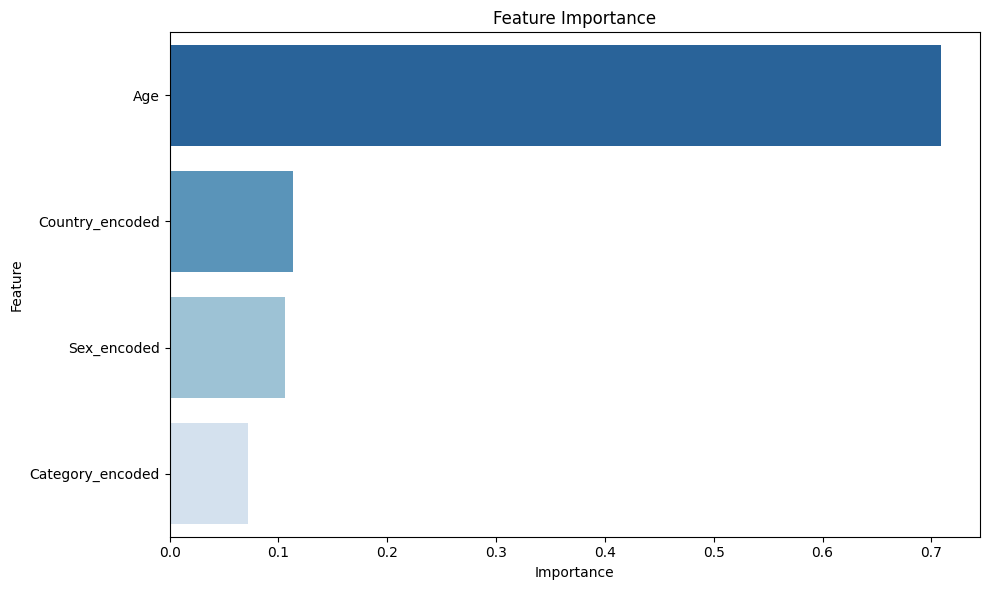

In [33]:

# -----------------------------
# Task 5.2: Extract feature importance
# -----------------------------
# Only tree-based models have feature_importances_
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    feature_names = X.columns
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    print("\n📊 Top Features:")
    print(importance_df.head())

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="Blues_r")
    plt.title("Feature Importance")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Feature importance not available for this model type.")
